In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import scipy as sp
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
plt.style.use('seaborn')

ModuleNotFoundError: No module named 'imblearn'

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')

In [0]:
train['fiberMag_u'] = train['fiberMag_u']* train['fiberMag_u']
train['psfMag_u'] = train['psfMag_u'] * train['psfMag_u']
test['fiberMag_u'] = test['fiberMag_u'] * test['fiberMag_u']
test['psfMag_u'] = test['psfMag_u'] * test['psfMag_u']

In [72]:
train

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,538.157599,21.431953,21.314148,21.176553,21.171444,509.915503,21.644453,21.657571,21.387653,21.572827,506.444301,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,459.302969,20.708104,20.678850,20.703420,20.473229,478.244289,21.029773,20.967054,20.937731,21.063646,456.279566,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,318.674315,16.727898,16.679677,16.694640,16.641788,330.217592,17.033098,16.999682,17.095999,17.076449,319.238723,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,432.219942,20.040371,19.926909,19.843840,19.463270,442.640794,20.317165,20.217898,20.073852,19.794505,417.544547,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,699.865398,23.058767,21.471406,19.504961,18.389096,660.522487,23.629122,21.742750,19.861718,18.810375,668.699727,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,199986,QSO,568,425.629101,20.437920,20.050756,20.020974,19.959646,438.840455,20.726709,20.311562,20.323418,20.211336,434.155584,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,199987,GALAXY,362,639.265240,22.807243,21.069792,20.187531,19.595598,711.698117,22.818723,20.786120,19.961857,19.457071,834.946560,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,199988,STAR_RED_DWARF,146,557.423885,21.902709,20.330747,18.457535,17.326771,591.502076,22.287946,20.711737,18.810560,17.721928,675.083952,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724
199989,199989,GALAXY,85,448.253729,20.561208,20.031754,19.793644,19.540471,471.069093,20.469748,19.872089,19.603742,19.372909,356.483909,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854


In [73]:
test

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,199991,251,567.268505,22.508963,20.981106,18.517316,17.076079,627.697397,23.167848,21.335901,18.835858,17.434384,494.915507,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
1,199992,386,520.158463,21.937111,20.335770,20.000512,19.527369,506.185410,22.186000,20.618879,20.301204,20.030078,472.185544,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
2,199993,232,442.019104,19.235669,18.304061,17.808608,17.380113,449.675188,19.439533,18.344433,17.909690,17.538164,429.427346,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
3,199994,557,420.390408,20.286261,20.197204,20.162419,20.059832,439.998110,20.611498,20.567262,20.479318,20.277472,413.279184,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
4,199995,75,587.812808,22.668237,21.239333,19.284777,18.235939,659.557958,22.935289,21.642456,19.624926,18.591749,497.660152,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,209995,389,390.656593,19.542406,19.439286,19.357957,19.357305,403.741027,19.827172,19.714033,19.686861,19.809697,395.322886,19.549257,19.457564,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976
10005,209996,247,398.402813,19.609379,19.325949,19.391290,19.258862,412.898919,19.928523,19.696262,19.763771,19.407112,403.425468,19.635609,19.381924,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412
10006,209997,941,450.369007,20.276182,20.090775,19.927208,19.766732,451.751824,20.551190,20.365800,20.200872,19.930425,440.916849,20.315201,20.236725,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932
10007,209998,674,467.660913,21.624585,21.093379,21.191775,21.186596,485.891273,21.950139,21.610805,21.501469,21.641811,498.190136,21.516809,21.270925,21.196019,21.331529,21.700769,21.589489,21.128330,21.430526,21.220902


In [0]:
train = train.drop(columns='petroMag_u')
test = test.drop(columns='petroMag_u')

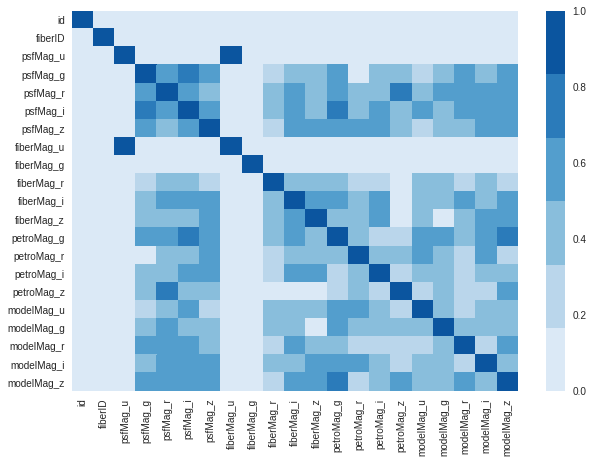

In [91]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [93]:
train

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
0,0,QSO,601,538.157599,21.431953,21.314148,21.176553,21.171444,509.915503,21.644453,21.657571,21.387653,21.572827,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,9
1,1,QSO,788,459.302969,20.708104,20.678850,20.703420,20.473229,478.244289,21.029773,20.967054,20.937731,21.063646,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,9
2,2,QSO,427,318.674315,16.727898,16.679677,16.694640,16.641788,330.217592,17.033098,16.999682,17.095999,17.076449,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,9
3,3,QSO,864,432.219942,20.040371,19.926909,19.843840,19.463270,442.640794,20.317165,20.217898,20.073852,19.794505,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,9
4,4,STAR_RED_DWARF,612,699.865398,23.058767,21.471406,19.504961,18.389096,660.522487,23.629122,21.742750,19.861718,18.810375,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,199986,QSO,568,425.629101,20.437920,20.050756,20.020974,19.959646,438.840455,20.726709,20.311562,20.323418,20.211336,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513,9
199987,199987,GALAXY,362,639.265240,22.807243,21.069792,20.187531,19.595598,711.698117,22.818723,20.786120,19.961857,19.457071,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306,7
199988,199988,STAR_RED_DWARF,146,557.423885,21.902709,20.330747,18.457535,17.326771,591.502076,22.287946,20.711737,18.810560,17.721928,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724,11
199989,199989,GALAXY,85,448.253729,20.561208,20.031754,19.793644,19.540471,471.069093,20.469748,19.872089,19.603742,19.372909,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854,7


In [94]:
train_x = train.drop(columns=['id','type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test
train_x

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,601,538.157599,21.431953,21.314148,21.176553,21.171444,509.915503,21.644453,21.657571,21.387653,21.572827,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,788,459.302969,20.708104,20.678850,20.703420,20.473229,478.244289,21.029773,20.967054,20.937731,21.063646,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,427,318.674315,16.727898,16.679677,16.694640,16.641788,330.217592,17.033098,16.999682,17.095999,17.076449,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,864,432.219942,20.040371,19.926909,19.843840,19.463270,442.640794,20.317165,20.217898,20.073852,19.794505,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,612,699.865398,23.058767,21.471406,19.504961,18.389096,660.522487,23.629122,21.742750,19.861718,18.810375,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,568,425.629101,20.437920,20.050756,20.020974,19.959646,438.840455,20.726709,20.311562,20.323418,20.211336,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,362,639.265240,22.807243,21.069792,20.187531,19.595598,711.698117,22.818723,20.786120,19.961857,19.457071,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,146,557.423885,21.902709,20.330747,18.457535,17.326771,591.502076,22.287946,20.711737,18.810560,17.721928,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724
199989,85,448.253729,20.561208,20.031754,19.793644,19.540471,471.069093,20.469748,19.872089,19.603742,19.372909,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854


In [95]:
ro_train_x, ro_train_y = RandomOverSampler(random_state=0).fit_sample(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import train_test_split
ro_X_train, ro_X_valid, ro_y_train, ro_y_valid = train_test_split(ro_train_x, ro_train_y, \
                                                  test_size=0.2, random_state=42, stratify = ro_train_y)

In [97]:
ro_X_train=pd.DataFrame(ro_X_train)
ro_X_train.columns=['fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u','fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']
ro_X_train


,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,506.0,379.895197,18.439524,18.383331,18.397926,18.406159,396.169357,18.776783,18.732025,18.747406,18.889927,18.503260,18.457094,18.464950,18.501788,19.587903,18.458845,18.391861,18.406464,18.495499
1,111.0,612.833097,25.334125,23.278356,20.151037,18.751744,681.640011,24.849024,22.714317,20.607167,19.010865,26.240566,25.435681,20.359853,18.843846,25.392213,24.593680,23.215330,20.136721,18.561175
2,272.0,621.324327,24.758404,23.977818,20.775207,19.036285,639.555463,24.348543,24.686373,21.369670,19.346993,26.084344,23.179414,21.020271,19.108676,25.098097,24.372681,23.807548,20.841216,18.959088
3,12.0,509.727677,20.346074,18.761644,18.295192,17.995475,540.712833,20.625938,19.158626,18.632589,18.276362,20.399902,18.774875,18.311771,17.926301,23.141076,20.287888,18.735657,18.234156,17.922341
4,359.0,283.079874,15.817038,15.623795,15.583491,15.565630,296.347259,16.152474,15.955997,15.929924,15.941995,15.847524,15.663948,15.624516,15.663664,16.867810,15.782826,15.620764,15.575819,15.592424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755131,594.0,540.275778,22.320165,21.049462,18.954794,17.889166,551.365745,22.773336,21.421332,19.359413,18.281137,22.458587,21.145569,19.003687,17.889437,24.253706,22.383919,21.056608,18.925036,17.895931
755132,203.0,319.498815,16.593536,16.781316,16.903203,16.995867,331.306853,16.907765,17.106444,17.273628,17.347684,16.639386,16.832214,16.988240,17.052133,17.898776,16.584924,16.769547,16.920110,16.983864
755133,280.0,428.682996,18.879365,18.036621,17.673649,17.477516,442.646712,19.194861,18.380265,17.994201,17.857070,18.890896,18.070603,17.700009,17.512508,20.756318,18.867395,18.020237,17.659006,17.482329
755134,481.0,452.537566,20.039656,20.128731,20.101879,19.861530,457.089686,20.385773,20.502062,20.600216,20.420251,20.049629,20.262256,20.497632,19.875416,21.320320,20.004456,20.054325,20.129877,19.756388


In [0]:
ro_X_valid=pd.DataFrame(ro_X_valid)
ro_X_valid.columns=['fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u','fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',  'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']

In [0]:
test_id=test['id']
test=test.drop(columns='id')

# XGBOOST

In [0]:
%%time
xgb_extra = XGBClassifier(n_estimators=120, n_jobs=-1, learning_rate=0.05,max_depth=15)
xgb_extra.fit(ro_X_train,ro_y_train, eval_set=[(ro_X_train, ro_y_train), (ro_X_valid, ro_y_valid)])

[0]	validation_0-merror:0.064247	validation_1-merror:0.072835
[1]	validation_0-merror:0.058509	validation_1-merror:0.067071
[2]	validation_0-merror:0.054823	validation_1-merror:0.063363
[3]	validation_0-merror:0.051799	validation_1-merror:0.060413
[4]	validation_0-merror:0.049855	validation_1-merror:0.058501
[5]	validation_0-merror:0.048826	validation_1-merror:0.057505
[6]	validation_0-merror:0.047327	validation_1-merror:0.056112
[7]	validation_0-merror:0.045998	validation_1-merror:0.054761
[8]	validation_0-merror:0.044885	validation_1-merror:0.053585
[9]	validation_0-merror:0.043853	validation_1-merror:0.052748
[10]	validation_0-merror:0.042881	validation_1-merror:0.051869
[11]	validation_0-merror:0.042222	validation_1-merror:0.051085
[12]	validation_0-merror:0.041514	validation_1-merror:0.05028
[13]	validation_0-merror:0.040741	validation_1-merror:0.049723
[14]	validation_0-merror:0.040046	validation_1-merror:0.048913
[15]	validation_0-merror:0.039372	validation_1-merror:0.048134
[16

# RANDOMFOREST (성능이 별로 좋지않음)

In [60]:
%%time
params = {
    'n_estimators': [50,100,200],
    'max_depth': [5,7,10]
}

rf=RandomForestClassifier(n_estimators=10)
grid_rf = GridSearchCV(estimator = rf,
                     param_grid = params,n_jobs=-1,cv=5)
grid_rf.fit(ro_X_train,ro_y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 3min 30s, sys: 312 ms, total: 3min 31s
Wall time: 2h 43min 30s


In [0]:
rf_pred=grid_rf.predict_proba(test)

In [67]:
submission=pd.DataFrame(data=rf_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,id,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
0,199991,0.000000,0.000000,0.007557,0.264402,0.000000,0.000000,0.001430,0.000937,0.001315,0.000000,0.709709,0.013260,0.000000,0.000472,0.000206,0.000000,0.000685,0.000000,0.000027
1,199992,0.001487,0.000000,0.000402,0.001684,0.000002,0.000508,0.004256,0.007418,0.089878,0.000000,0.001908,0.401066,0.001636,0.471672,0.003609,0.000000,0.000110,0.007352,0.007013
2,199993,0.004835,0.001941,0.000000,0.000000,0.000642,0.000403,0.945812,0.000000,0.004491,0.000000,0.000084,0.014369,0.000000,0.004081,0.020734,0.000000,0.000646,0.001904,0.000057
3,199994,0.005196,0.003868,0.000000,0.000100,0.000000,0.002046,0.000194,0.149711,0.080294,0.000000,0.000000,0.076499,0.012370,0.082961,0.000118,0.000000,0.000000,0.040035,0.546607
4,199995,0.000000,0.000000,0.000565,0.028769,0.000004,0.000000,0.000470,0.001038,0.001810,0.000000,0.945456,0.020481,0.000000,0.000635,0.000215,0.000000,0.000533,0.000000,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,209995,0.161279,0.039761,0.000000,0.000244,0.000029,0.080248,0.010102,0.097546,0.067255,0.000000,0.000007,0.108569,0.007473,0.076504,0.003452,0.000000,0.000000,0.053135,0.294396
10005,209996,0.116398,0.047867,0.000000,0.000397,0.000005,0.081096,0.009973,0.064296,0.074701,0.000000,0.000007,0.110587,0.026602,0.095817,0.011697,0.000000,0.000000,0.072424,0.288133
10006,209997,0.007300,0.001787,0.000000,0.000213,0.000002,0.002778,0.001277,0.048621,0.397977,0.000000,0.000005,0.110683,0.031759,0.143839,0.004547,0.000000,0.000000,0.026249,0.222964
10007,209998,0.000070,0.000000,0.000000,0.000347,0.000000,0.000013,0.000359,0.006068,0.971676,0.000305,0.000370,0.007295,0.000000,0.004859,0.000000,0.000000,0.000000,0.000000,0.008640


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/rf_submission.csv', index=False)

In [0]:
xgb_extra_pred= xgb_extra.predict_proba(test)

In [0]:
submission=pd.DataFrame(data=xgb_extra_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,id,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
0,199991,0.002308,0.002314,0.002302,0.123861,0.002308,0.002317,0.002370,0.002319,0.002561,0.002303,0.831633,0.004717,0.002304,0.002344,0.002302,0.002304,0.002315,0.004800,0.002319
1,199992,0.002662,0.002668,0.002654,0.002683,0.002662,0.002672,0.004522,0.002683,0.247614,0.002655,0.002661,0.460762,0.002664,0.247040,0.002668,0.002657,0.002655,0.002669,0.002748
2,199993,0.000839,0.000739,0.000735,0.000737,0.000741,0.001102,0.977456,0.000740,0.001713,0.000736,0.000738,0.006779,0.000736,0.000974,0.002284,0.000736,0.000736,0.000738,0.000743
3,199994,0.002530,0.002527,0.002509,0.002518,0.002515,0.002525,0.002555,0.015410,0.041847,0.002510,0.002519,0.044863,0.002572,0.057166,0.002521,0.002511,0.002509,0.002899,0.804993
4,199995,0.000748,0.000750,0.000746,0.001316,0.000748,0.000751,0.000774,0.000751,0.000944,0.000746,0.978844,0.006963,0.000746,0.001201,0.000885,0.000746,0.000746,0.000845,0.000751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,209995,0.088640,0.036104,0.003593,0.003602,0.003603,0.010104,0.003660,0.018166,0.044327,0.003594,0.003608,0.171774,0.003595,0.061370,0.003612,0.003597,0.003594,0.003595,0.529861
10005,209996,0.118654,0.044626,0.005190,0.005203,0.005204,0.026871,0.005287,0.018338,0.063903,0.005192,0.005212,0.150073,0.005192,0.124786,0.005217,0.005195,0.005192,0.005202,0.395462
10006,209997,0.000565,0.000567,0.000564,0.000571,0.000566,0.000568,0.000578,0.001474,0.982815,0.000564,0.000567,0.002529,0.000628,0.003139,0.000567,0.000565,0.000564,0.000567,0.002042
10007,209998,0.000602,0.000603,0.000600,0.000607,0.000602,0.000604,0.000633,0.000607,0.988444,0.000600,0.000633,0.000704,0.000602,0.000637,0.000603,0.000601,0.000600,0.000603,0.001115


In [0]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/xgb_extra(2)_submission.csv', index=False)